# 공시지가와 동물병원 인허가수 분석  
## 서울시 법정동을 중심으로 새로운 동물 병원 개원을 위해

(1) 주제 선정 이유 : 애완동물은 이제 반려동물이라는 이름으로 우리 삶과 밀접한 연관을 가지고 있다. 반려동물의 사회적 인식이 높아짐에 따라 동물병원은 반려동물의 건강을 책임지는 중요한 기관으로 자리잡았다. 따라서 본 project에서는 동물병원이 위치하는 공시지가와의 관계를 분석하는 한편, 동물병원이 부족한 법정동이 존재하는지 살펴본다.

(2) 가설 정의: 법정동의 공시지가와 동물병원 인허가수를 통해 서울시 법정동을 5개의 군으로 분석하여, 공시지가가 낮고, 인접한 동물병원이 적은 군을 파악한다. 파악된 군을 바탕으로 법정동별 등록 동물 수에 따라 새롭게 동물병원을 개원하기 적합한 법정동을 제시한다.

(3) 인터넷을 통한 데이터 획득 : project를 실행하기 위해 인터넷을 통해 수집한 자료의 목록은 다음과 같다.  
1. 서울시 공시지가 https://data.seoul.go.kr/dataList/OA-1180/F/1/datasetView.do
2. 서울시 동물병원 인허가 정보 https://data.seoul.go.kr/dataList/OA-16007/S/1/datasetView.do
3. 서울시 강남구 반려동물 등록현황 https://www.data.go.kr/data/15040419/fileData.do

(4) 분석을 위한 데이터의 가공

데이터를 원하는 형태로 가공하기 위해 다음과 같은 라이브러리를 사용했다.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.cluster import KMeans

In [5]:
import seaborn as sns

In [6]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #windows
# matplotlib.rcParams['font.family'] = 'Apple Gothic' #Mac
matplotlib.rcParams['font.size'] = 15 #글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상 해결

# 공시지가

서울시 공시지가 정보

In [7]:
df = pd.read_csv('avl_2021.csv', encoding = "cp949", low_memory = False)

데이터의 열 확인

In [8]:
df.columns

Index(['시도명', '시군구명', '법정동명', '토지코드', '공시지가(원/㎡)', '시군구코드', '법정동코드', '필지구분코드',
       '필지구분명', '본번', '부번', '기준년도', '기준년월'],
      dtype='object')

데이터 원본 확인

In [9]:
df

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월
0,서울특별시,성북구,하월곡동,1129013600100240001,3724000,11290,13600,1,토지,0024,0001,2021,2021-01-01
1,서울특별시,성북구,하월곡동,1129013600101290000,7330000,11290,13600,1,토지,0129,0000,2021,2021-07-01
2,서울특별시,성북구,하월곡동,1129013600100920050,5838000,11290,13600,1,토지,0092,0050,2021,2021-07-01
3,서울특별시,성북구,하월곡동,1129013600100920001,1204000,11290,13600,1,토지,0092,0001,2021,2021-07-01
4,서울특별시,성북구,하월곡동,1129013600100901480,5308000,11290,13600,1,토지,0090,1480,2021,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911157,서울특별시,성북구,종암동,1129013500100030050,2740000,11290,13500,1,토지,0003,0050,2021,2021-01-01
911158,서울특별시,성북구,종암동,1129013500100030049,2740000,11290,13500,1,토지,0003,0049,2021,2021-01-01
911159,서울특별시,성북구,종암동,1129013500100030048,2740000,11290,13500,1,토지,0003,0048,2021,2021-01-01
911160,서울특별시,성북구,종암동,1129013500100030047,2792000,11290,13500,1,토지,0003,0047,2021,2021-01-01


불필요한 시도명, 토지코드, 시군구코드, 법정동 코드, 필지구분코드, 필지구분명, 본번, 부번, 기준년도, 기준년월 등을 제외한다

In [10]:
df1 = df[['시군구명','법정동명','공시지가(원/㎡)']]
df1

,시군구명,법정동명,공시지가(원/㎡)
0,성북구,하월곡동,3724000
1,성북구,하월곡동,7330000
2,성북구,하월곡동,5838000
3,성북구,하월곡동,1204000
4,성북구,하월곡동,5308000
...,...,...,...
911157,성북구,종암동,2740000
911158,성북구,종암동,2740000
911159,성북구,종암동,2740000
911160,성북구,종암동,2792000


법정동을 기준으로 공시지가의 평균가를 구한다.

In [11]:
meandf = df1.groupby('법정동명').mean()
meandf

,공시지가(원/㎡)
법정동명,
가락동,6.462785e+06
가리봉동,3.244295e+06
가산동,2.883660e+06
가양동,3.669012e+06
가회동,5.282640e+06
...,...
후암동,4.460140e+06
훈정동,2.443023e+06
휘경동,3.183899e+06


In [12]:
meandf.to_csv('meandf.csv', encoding='utf-8-sig')

465개 동에 대한 평균 공시지가를 얻었다.

# -------------------------------------------------

# 동물 병원 인허가 정보

동물 병원 인허가 정보

In [13]:
SAH = pd.read_csv('seoul_animal_hospital.csv', encoding = "cp949", low_memory = False)

불필요한 열들을 제거해준다.

In [14]:
SAH.columns

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '축산업무구분명', '축산물가공업구분명',
       '축산일련번호', '권리주체일련번호', '총인원'],
      dtype='object')

In [15]:
SAH1 = SAH[['상세영업상태명', '지번주소', '도로명주소']]
SAH1

,상세영업상태명,지번주소,도로명주소
0,휴업,서울특별시 종로구 효자동 31번지,서울특별시 종로구 자하문로 66-2 (효자동)
1,폐업,서울특별시 종로구 평창동 289-2 번지,NaN
2,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레)
3,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동)
4,폐업,서울특별시 관악구 신림동 1484-6 101호,서울특별시 관악구 남부순환로 1444 101호 (신림동)
...,...,...,...
2030,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동)
2031,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동)
2032,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동)
2033,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동)


폐업, 휴업한 영업장을 제외한다.

In [16]:
OPB = SAH1.groupby('상세영업상태명').get_group('정상') #open business

index를 초기화

In [17]:
OPB1 = OPB.reset_index(drop=True)
OPB1

,상세영업상태명,지번주소,도로명주소
0,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레)
1,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동)
2,정상,서울특별시 송파구 방이동 180-3 올림픽타워빌,서울특별시 송파구 백제고분로 506 4층 (방이동 올림픽타워빌)
3,정상,서울특별시 마포구 동교동 200-29,서울특별시 마포구 동교로 193 (동교동)
4,정상,서울특별시 강남구 청담동 46 베디베로스퀘어,서울특별시 강남구 삼성로133길 7 베디베로스퀘어 234층 (청담동)
...,...,...,...
897,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동)
898,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동)
899,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동)
900,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동)


공시지가와의 통일을 위해 지번주소, 도로명 주소를 법정동명으로 변경한다.

지번주소의 법정동명을 추출

In [18]:
OPB1['법정동명0'] = OPB1['지번주소'].str.split(" ", expand=True)[2]
OPB1

,상세영업상태명,지번주소,도로명주소,법정동명0
0,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레),대림동
1,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동),묵동
2,정상,서울특별시 송파구 방이동 180-3 올림픽타워빌,서울특별시 송파구 백제고분로 506 4층 (방이동 올림픽타워빌),방이동
3,정상,서울특별시 마포구 동교동 200-29,서울특별시 마포구 동교로 193 (동교동),동교동
4,정상,서울특별시 강남구 청담동 46 베디베로스퀘어,서울특별시 강남구 삼성로133길 7 베디베로스퀘어 234층 (청담동),청담동
...,...,...,...,...
897,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동),봉천동
898,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동),역삼동
899,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동),문정동
900,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동),석촌동


도로명주소의 법정동명을 추출

In [19]:
OPB1['도로명주소'].str.split(" ", expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,서울특별시,영등포구,신길로,29,105동,116호,(대림동,e편한세상,영등포,아델포레),None,None,None,None,None,None,None
1,서울특별시,중랑구,동일로,925,3층,(묵동),None,None,None,None,None,None,None,None,None,None,None
2,서울특별시,송파구,백제고분로,506,4층,(방이동,올림픽타워빌),None,None,None,None,None,None,None,None,None,None
3,서울특별시,마포구,동교로,193,(동교동),None,None,None,None,None,None,None,None,None,None,None,None
4,서울특별시,강남구,삼성로133길,7,베디베로스퀘어,234층,(청담동),None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,서울특별시,관악구,남부순환로,1747-1,(봉천동),None,None,None,None,None,None,None,None,None,None,None,None
898,서울특별시,강남구,테헤란로34길,26,제이유34,2층,(역삼동),None,None,None,None,None,None,None,None,None,None
899,서울특별시,송파구,새말로,125,어은회관,(문정동),None,None,None,None,None,None,None,None,None,None,None
900,서울특별시,송파구,삼학사로,88,금보,1층,(석촌동),None,None,None,None,None,None,None,None,None,None


도로명주소 괄호안의 법정동명을 추출

In [20]:
OPB1['법정동명1'] = OPB1['도로명주소'].str.extract('\((.*?)\)').dropna(how='all')
OPB1

,상세영업상태명,지번주소,도로명주소,법정동명0,법정동명1
0,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레),대림동,대림동 e편한세상 영등포 아델포레
1,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동),묵동,묵동
2,정상,서울특별시 송파구 방이동 180-3 올림픽타워빌,서울특별시 송파구 백제고분로 506 4층 (방이동 올림픽타워빌),방이동,방이동 올림픽타워빌
3,정상,서울특별시 마포구 동교동 200-29,서울특별시 마포구 동교로 193 (동교동),동교동,동교동
4,정상,서울특별시 강남구 청담동 46 베디베로스퀘어,서울특별시 강남구 삼성로133길 7 베디베로스퀘어 234층 (청담동),청담동,청담동
...,...,...,...,...,...
897,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동),봉천동,봉천동
898,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동),역삼동,역삼동
899,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동),문정동,문정동
900,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동),석촌동,석촌동


In [21]:
OPB1['법정동명1'] = OPB1['법정동명1'].str.split(" ", expand=True)[0]
OPB1

,상세영업상태명,지번주소,도로명주소,법정동명0,법정동명1
0,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레),대림동,대림동
1,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동),묵동,묵동
2,정상,서울특별시 송파구 방이동 180-3 올림픽타워빌,서울특별시 송파구 백제고분로 506 4층 (방이동 올림픽타워빌),방이동,방이동
3,정상,서울특별시 마포구 동교동 200-29,서울특별시 마포구 동교로 193 (동교동),동교동,동교동
4,정상,서울특별시 강남구 청담동 46 베디베로스퀘어,서울특별시 강남구 삼성로133길 7 베디베로스퀘어 234층 (청담동),청담동,청담동
...,...,...,...,...,...
897,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동),봉천동,봉천동
898,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동),역삼동,역삼동
899,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동),문정동,문정동
900,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동),석촌동,석촌동


시군구명 역시 분류를 위해 추출한다.

In [22]:
OPB1['시군구명'] = OPB1['지번주소'].str.split(" ", expand=True)[1]
OPB1

,상세영업상태명,지번주소,도로명주소,법정동명0,법정동명1,시군구명
0,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레),대림동,대림동,영등포구
1,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동),묵동,묵동,중랑구
2,정상,서울특별시 송파구 방이동 180-3 올림픽타워빌,서울특별시 송파구 백제고분로 506 4층 (방이동 올림픽타워빌),방이동,방이동,송파구
3,정상,서울특별시 마포구 동교동 200-29,서울특별시 마포구 동교로 193 (동교동),동교동,동교동,마포구
4,정상,서울특별시 강남구 청담동 46 베디베로스퀘어,서울특별시 강남구 삼성로133길 7 베디베로스퀘어 234층 (청담동),청담동,청담동,강남구
...,...,...,...,...,...,...
897,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동),봉천동,봉천동,관악구
898,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동),역삼동,역삼동,강남구
899,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동),문정동,문정동,송파구
900,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동),석촌동,석촌동,송파구


영업 중인 동물 병원의 지번, 도로명 주소를 법정동명으로 변경한다.

In [23]:
OPB1[['법정동명0','법정동명1']]

,법정동명0,법정동명1
0,대림동,대림동
1,묵동,묵동
2,방이동,방이동
3,동교동,동교동
4,청담동,청담동
...,...,...
897,봉천동,봉천동
898,역삼동,역삼동
899,문정동,문정동
900,석촌동,석촌동


잘못된 법정동명이 기입되어 있는 경우를 방지하기 위해 지번주소의 법정동명과 도로명주소의 법정동명을 이중으로 확인한다.

최종적으로 영업중인 동물병원들이 위치한 법정동명을 얻었다.

In [24]:
OPB1['법정동명'] = np.where(pd.notnull(OPB1['법정동명0']) == True, OPB1['법정동명0'], OPB1['법정동명1'])
OPB1

,상세영업상태명,지번주소,도로명주소,법정동명0,법정동명1,시군구명,법정동명
0,정상,서울특별시 영등포구 대림동 1127 e편한세상 영등포 아델포레,서울특별시 영등포구 신길로 29 105동 116호 (대림동 e편한세상 영등포 아델포레),대림동,대림동,영등포구,대림동
1,정상,서울특별시 중랑구 묵동 238-8 하태윤산부인과,서울특별시 중랑구 동일로 925 3층 (묵동),묵동,묵동,중랑구,묵동
2,정상,서울특별시 송파구 방이동 180-3 올림픽타워빌,서울특별시 송파구 백제고분로 506 4층 (방이동 올림픽타워빌),방이동,방이동,송파구,방이동
3,정상,서울특별시 마포구 동교동 200-29,서울특별시 마포구 동교로 193 (동교동),동교동,동교동,마포구,동교동
4,정상,서울특별시 강남구 청담동 46 베디베로스퀘어,서울특별시 강남구 삼성로133길 7 베디베로스퀘어 234층 (청담동),청담동,청담동,강남구,청담동
...,...,...,...,...,...,...,...
897,정상,서울특별시 관악구 봉천동 923-23,서울특별시 관악구 남부순환로 1747-1 (봉천동),봉천동,봉천동,관악구,봉천동
898,정상,서울특별시 강남구 역삼동 725-29 제이유34,서울특별시 강남구 테헤란로34길 26 제이유34 2층 (역삼동),역삼동,역삼동,강남구,역삼동
899,정상,서울특별시 송파구 문정동 85 어은회관,서울특별시 송파구 새말로 125 어은회관 (문정동),문정동,문정동,송파구,문정동
900,정상,서울특별시 송파구 석촌동 2-9 금보 1층,서울특별시 송파구 삼학사로 88 금보 1층 (석촌동),석촌동,석촌동,송파구,석촌동


In [25]:
OPB1.to_csv('OPB1.csv', encoding='utf-8-sig')

가공한 법정동명 데이터에 문제가 없는지 확인한다.

In [26]:
OPBF = OPB1['법정동명']

In [27]:
OPBF.isnull().values.any()

False

OPB1의 '법정동명' 열에 NaN값이 없는 것을 확인했다.

법정동별 동물병원 인허가 수를 추출한다.

In [28]:
freq = OPB1[['법정동명','시군구명']].value_counts()
freq

법정동명    시군구명
목동      양천구     21
상계동     노원구     20
화곡동     강서구     17
미아동     강북구     16
방배동     서초구     16
                ..
명륜2가    종로구      1
양평동1가   영등포구     1
마장동     성동구      1
동소문동5가  성북구      1
세곡동     강남구      1
Length: 212, dtype: int64

법정동별 인허가 수

In [29]:
freq.to_csv('freq.csv', encoding='utf-8-sig')

In [30]:
freq = pd.read_csv('freq.csv', encoding = "utf-8", low_memory = False)

법정동명을 새로운 index로 갖는 데이터로 최종적으로 가공했다.

In [31]:
freq0 = freq.columns = ['법정동명', '시군구명','인허가수']
freq1 = freq.set_index('법정동명').sort_index()
freq1

,시군구명,인허가수
법정동명,,
가락동,송파구,6
가산동,금천구,1
가양동,강서구,3
갈현동,은평구,5
강일동,강동구,2
...,...,...
회기동,동대문구,1
효창동,용산구,2
후암동,용산구,2


동마다 허가된 동물 병원의 수를 얻었다.

(5) 분석 결과 도출

공시지가와 인허가 수 데이터를 병합.  

In [32]:
meandf

,공시지가(원/㎡)
법정동명,
가락동,6.462785e+06
가리봉동,3.244295e+06
가산동,2.883660e+06
가양동,3.669012e+06
가회동,5.282640e+06
...,...
후암동,4.460140e+06
훈정동,2.443023e+06
휘경동,3.183899e+06


In [33]:
freq1

,시군구명,인허가수
법정동명,,
가락동,송파구,6
가산동,금천구,1
가양동,강서구,3
갈현동,은평구,5
강일동,강동구,2
...,...,...
회기동,동대문구,1
효창동,용산구,2
후암동,용산구,2


법정동명을 기준으로 두 데이터를 병합

In [34]:
data = pd.merge(meandf, freq1, on='법정동명')
data

,공시지가(원/㎡),시군구명,인허가수
법정동명,,,
가락동,6.462785e+06,송파구,6
가산동,2.883660e+06,금천구,1
가양동,3.669012e+06,강서구,3
갈현동,3.147704e+06,은평구,5
강일동,1.094709e+06,강동구,2
...,...,...,...
회기동,3.936792e+06,동대문구,1
효창동,4.842546e+06,용산구,2
후암동,4.460140e+06,용산구,2


자료의 대략적인 정보는 다음과 같다.

In [35]:
data.describe()

,공시지가(원/㎡),인허가수
count,2.120000e+02,212.000000
mean,4.739679e+06,4.169811
std,2.583581e+06,3.809372
min,1.026113e+06,1.000000
25%,2.983219e+06,1.000000
50%,4.040603e+06,3.000000
75%,5.788370e+06,6.000000
max,1.517764e+07,21.000000


분석 목적에 따라 이상치는 따로 구분하지 않았다.

정규분포를 이용해 자료를 정규화한다

In [36]:
data1 = data[['공시지가(원/㎡)','인허가수']]
data1

,공시지가(원/㎡),인허가수
법정동명,,
가락동,6.462785e+06,6
가산동,2.883660e+06,1
가양동,3.669012e+06,3
갈현동,3.147704e+06,5
강일동,1.094709e+06,2
...,...,...
회기동,3.936792e+06,1
효창동,4.842546e+06,2
후암동,4.460140e+06,2


In [37]:
normalization_data = (data1 - data1.mean())/data1.std()
normalization_data.head(211)

,공시지가(원/㎡),인허가수
법정동명,,
가락동,0.666945,0.480444
가산동,-0.718390,-0.832109
가양동,-0.414412,-0.307088
갈현동,-0.616190,0.217933
강일동,-1.410821,-0.569598
...,...,...
황학동,0.591150,-0.307088
회기동,-0.310765,-0.832109
효창동,0.039816,-0.569598


In [38]:
normalization_data.columns

Index(['공시지가(원/㎡)', '인허가수'], dtype='object')

더 이상 공시지가가 (원/㎡)단위가 아니니 변경해준다.

In [39]:
normalization_data.rename(columns={'공시지가(원/㎡)':'공시지가'}, inplace = True)

scatter plot

In [40]:
x = normalization_data['공시지가']
y = normalization_data['인허가수']

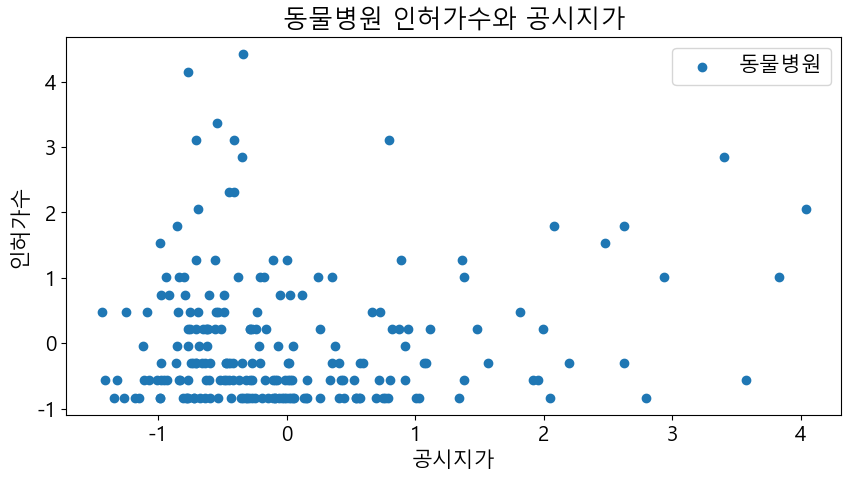

In [41]:
plt.figure(figsize=(10,5), dpi = 100) 
plt.scatter(x,y, label='동물병원')
plt.xlabel('공시지가')
plt.ylabel('인허가수')
plt.legend()
plt.title('동물병원 인허가수와 공시지가')
plt.show()

공시지가가 높음에도 많은 동물병원을 보유한 청담동 등이 존재함을 확인할 수 있었다.

K-Means 클러스터링으로 자료를 분류

K는 5로 설정했다.

In [42]:
np.random.seed(1)
points = normalization_data.values
kmeans = KMeans(n_clusters = 5, random_state=1)
kmeans.fit(points)
kmeans.cluster_centers_
normalization_data['cluster'] = kmeans.labels_

분류는 다음과 같다

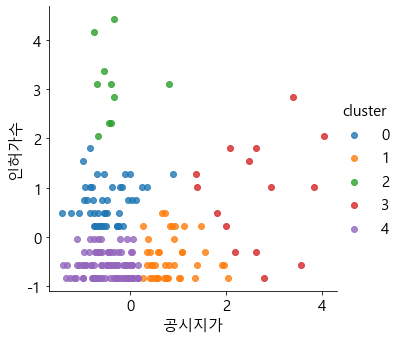

In [43]:
np.random.seed(1)
sns.lmplot(x = "공시지가", y="인허가수",fit_reg = False, data = normalization_data, hue = "cluster")

공시지가가 낮고 인허가수도 낮은 4군    
공시지가가 낮고 인허가수가 중간인 0군  
공시지가가 낮고 인허가수가 높은 2군  
공시지가가 중간이고 인허가수가 낮은 1군  
나머지 3군으로 분류되었다.

클러스터맵으로 확인하면 다음과 같은 관계를 갖고 있음을 알 수 있다.

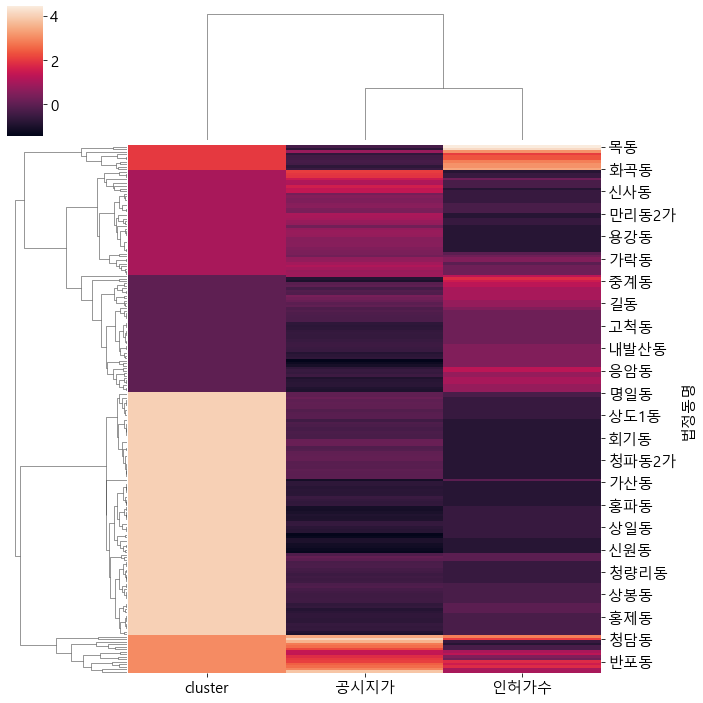

In [44]:
sns.clustermap(normalization_data)

주목해야할 부분은 공시지가도 낮고 인허가수도 적은 4군에 속한 동이다.

In [45]:
main = normalization_data[normalization_data['cluster'] == 4] 
main

,공시지가,인허가수,cluster
법정동명,,,
가산동,-0.718390,-0.832109,4
가양동,-0.414412,-0.307088,4
강일동,-1.410821,-0.569598,4
고덕동,-0.848769,-0.044577,4
공항동,-0.719434,-0.832109,4
...,...,...,...
회기동,-0.310765,-0.832109,4
효창동,0.039816,-0.569598,4
후암동,-0.108198,-0.569598,4


4군의 대략적인 정보는 다음과 같다.

In [46]:
main.describe()

,공시지가,인허가수,cluster
count,98.000000,98.000000,98.0
mean,-0.476482,-0.582992,4.0
std,0.400420,0.253905,0.0
min,-1.410821,-0.832109,4.0
25%,-0.763601,-0.832109,4.0
50%,-0.450993,-0.569598,4.0
75%,-0.107399,-0.307088,4.0
max,0.157280,-0.044577,4.0


공시지가와 동물병원의 인허가수가 1분위수보다 적은 동에 대해서 인접한 동의 동물 병원 수를 파악한다.

In [47]:
condition1 = ((main['인허가수'] < -0.822110) & (main['공시지가'] < -0.763601))
condition2 = main[condition1]
condition2

,공시지가,인허가수,cluster
법정동명,,,
구산동,-0.804344,-0.832109,4
궁동,-1.146904,-0.832109,4
도림동,-0.780693,-0.832109,4
돈암동,-0.987446,-0.832109,4
성북동,-0.763689,-0.832109,4
세곡동,-1.178373,-0.832109,4
수서동,-0.773643,-0.832109,4
신영동,-0.984380,-0.832109,4
신원동,-1.263513,-0.832109,4


각 법정동이 속한 구의 반려동물 보유여부를 확인한다.

In [48]:
index = condition2.index.values
index

array(['구산동', '궁동', '도림동', '돈암동', '성북동', '세곡동', '수서동', '신영동', '신원동',
       '천왕동'], dtype=object)

In [49]:
Gu = []

for i in index.tolist():
    Gu.append(df.loc[df['법정동명'] == i ,'시군구명'].iloc[0])
Gu

['은평구', '구로구', '영등포구', '성북구', '성북구', '강남구', '강남구', '종로구', '서초구', '구로구']

중복되는 구를 지워준다.

In [50]:
Gu1 = []
for i in Gu:
    if (Gu1.count(i) == 0):
        Gu1.append(i)
Gu1

['은평구', '구로구', '영등포구', '성북구', '강남구', '종로구', '서초구']

구별 반려동물 보유 여부

In [51]:
animals = pd.read_csv('animals.csv', encoding = "cp949", low_memory = False)
animals1 = animals.set_index('시군구명').sort_values('반려동물 보유여부(%)')
animals1

,반려동물 보유여부(%)
시군구명,
금천구,12.9
관악구,14.7
도봉구,15.0
중구,15.9
성동구,16.3
은평구,16.3
강서구,16.5
마포구,17.4
동작구,17.5


해당 구별 반려 동물 보유 여부를 파악한다.

In [52]:
animals1.loc[Gu1, '반려동물 보유여부(%)']

시군구명
은평구     16.3
구로구     21.7
영등포구    20.2
성북구     18.5
강남구     33.7
종로구     25.9
서초구     22.2
Name: 반려동물 보유여부(%), dtype: float64

반려동물 보유 비율이 가장 높은 강남구의 세곡동과 수서동에 대해서 더욱 자세하게 조사해본다.

강남구 법정동별 반려동물 등록 현황

In [53]:
gangnam = pd.read_csv('gangnam.csv', encoding = "cp949", low_memory = False)
gangnam = gangnam.set_index('법정동명').sort_index()
gangnam

,내장형 칩(RFID),외장형 칩(RFID),인식표,등록 품종수,동물 소유자수,동물 등록수
법정동명,,,,,,
개포동,1185,1699,305,74,2459,3189
논현동,2010,1430,450,97,2792,3890
대치동,1935,1756,518,91,3446,4209
도곡동,1327,1279,271,69,2294,2877
삼성동,1424,1022,456,88,2152,2902
세곡동,274,306,61,54,505,641
수서동,421,496,75,54,781,992
신사동,435,325,114,69,670,874
압구정동,896,803,185,65,1457,1884


In [54]:
gangnam.index.values

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동',
       '역삼동', '율현동', '일원동', '자곡동', '청담동'], dtype=object)

In [55]:
gang_list = gangnam.index.values.tolist()
gang_list

['개포동',
 '논현동',
 '대치동',
 '도곡동',
 '삼성동',
 '세곡동',
 '수서동',
 '신사동',
 '압구정동',
 '역삼동',
 '율현동',
 '일원동',
 '자곡동',
 '청담동']

강남구에 위치한 동물병원들의 정보

In [56]:
ques = (data['시군구명'] == '강남구')
data[ques]

,공시지가(원/㎡),시군구명,인허가수
법정동명,,,
개포동,5.057810e+06,강남구,7
논현동,1.112697e+07,강남구,10
대치동,1.232903e+07,강남구,8
도곡동,8.575489e+06,강남구,5
삼성동,1.462960e+07,강남구,8
세곡동,1.695258e+06,강남구,1
수서동,2.740910e+06,강남구,1
신사동,8.313452e+06,강남구,8
압구정동,1.396613e+07,강남구,2


동물병원이 존재하지 않는 율현동을 확인

In [57]:
for i in gang_list:
    if i in data.index:
        print(data[ques].loc[[i], '인허가수'])
    else:
        print(i)
        print("동물병원 없음")
        print(' ')
        continue
    print('')

법정동명
개포동    7
Name: 인허가수, dtype: int64

법정동명
논현동    10
Name: 인허가수, dtype: int64

법정동명
대치동    8
Name: 인허가수, dtype: int64

법정동명
도곡동    5
Name: 인허가수, dtype: int64

법정동명
삼성동    8
Name: 인허가수, dtype: int64

법정동명
세곡동    1
Name: 인허가수, dtype: int64

법정동명
수서동    1
Name: 인허가수, dtype: int64

법정동명
신사동    8
Name: 인허가수, dtype: int64

법정동명
압구정동    2
Name: 인허가수, dtype: int64

법정동명
역삼동    15
Name: 인허가수, dtype: int64

율현동
동물병원 없음
 
법정동명
일원동    4
Name: 인허가수, dtype: int64

법정동명
자곡동    3
Name: 인허가수, dtype: int64

법정동명
청담동    12
Name: 인허가수, dtype: int64



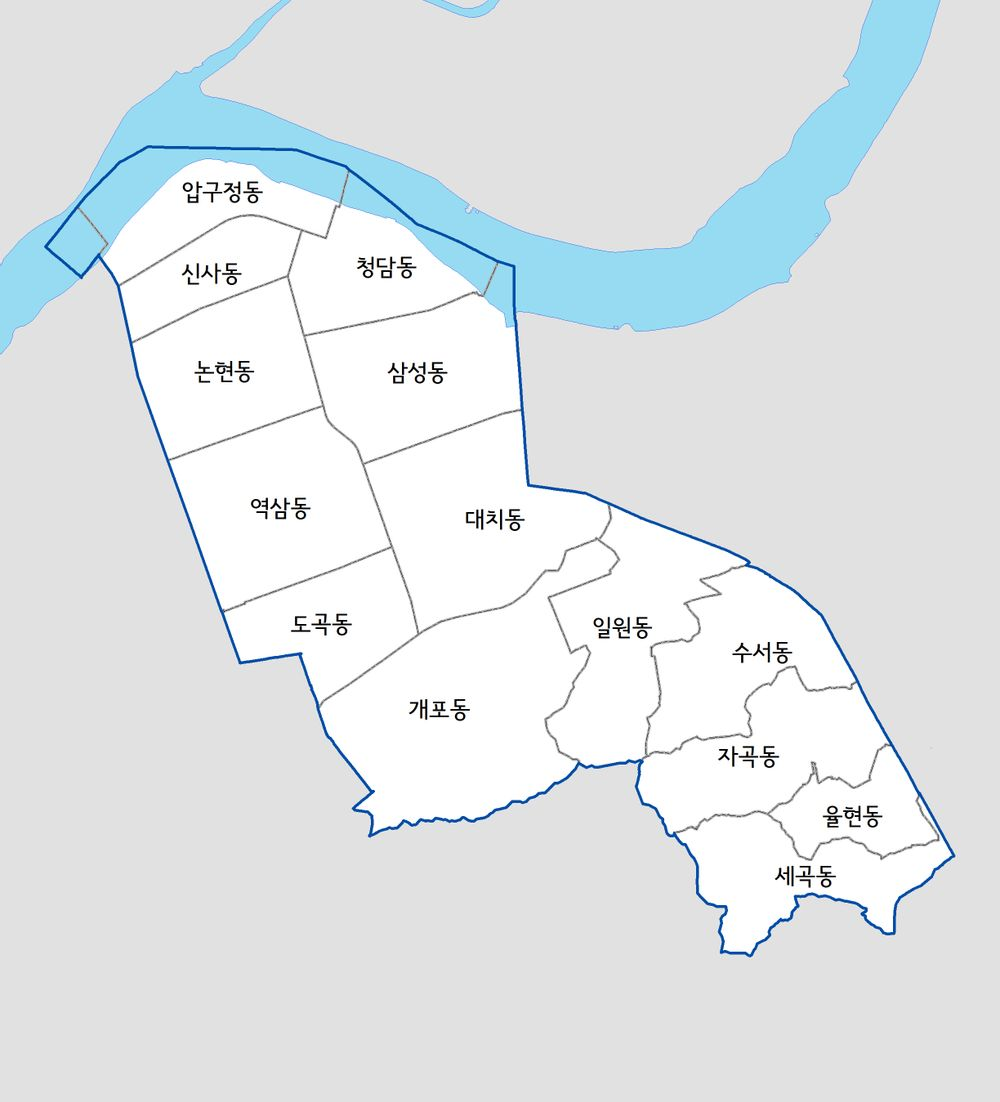

수서동과 세곡동의 인접동은 일원동, 자곡동, 율현동이 있다.

각 법정동의 반려동물 등록 현황은 다음과 같다.

In [58]:
gangnamgu = gangnam.loc[['수서동','세곡동','일원동','자곡동','율현동']]
gangnamgu

,내장형 칩(RFID),외장형 칩(RFID),인식표,등록 품종수,동물 소유자수,동물 등록수
법정동명,,,,,,
수서동,421,496,75,54,781,992
세곡동,274,306,61,54,505,641
일원동,738,635,382,66,1414,1755
자곡동,414,404,80,55,697,898
율현동,91,60,8,30,120,159


In [59]:
gangnamgu1 = data[ques].loc[['수서동','세곡동','일원동','자곡동']]
gangnamgu1

,공시지가(원/㎡),시군구명,인허가수
법정동명,,,
수서동,2.740910e+06,강남구,1
세곡동,1.695258e+06,강남구,1
일원동,4.874356e+06,강남구,4
자곡동,2.212931e+06,강남구,3


각 법정동의 동물병원 당 동물의 수는 다음과 같다.

In [60]:
gangnamgu['동물 등록수'] / gangnamgu1['인허가수']

법정동명
세곡동    641.000000
수서동    992.000000
율현동           NaN
일원동    438.750000
자곡동    299.333333
dtype: float64

(6) 결론

공시지가와 인허가수의 명확한 인과관계는 파악할 수 없었다.  
공시지가가 낮고 인허가수가 높은 개체도 존재했으며, 반대의 개체도 존재했다.

하지만 공시지가가 낮고 인허가수가 적은 군을 분류해 새로운 동물병원을 개원하기에 적합한 개체들을 구별할 수 있었다.

공시지가와 인허가수가 모두 낮은 4군에 속하며, 동물병원 당 동물의 수가 가장 많은 '수서동'에 새로운 동물 병원을 개원하기 적합했다.

(7) 참고문헌

밑바닥부터 시작하는 데이터 과학, 조엘 그루스, 인사이트, 2016  
파이썬으로 데이터 주무르기, 민홍기, 비제이퍼블릭, 2017  

(8) 별첨 : (3)의 획득한 데이터 원본

서울시 공시지가 정보

In [61]:
df = pd.read_csv('avl_2021.csv', encoding = "cp949", low_memory = False)
df

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월
0,서울특별시,성북구,하월곡동,1129013600100240001,3724000,11290,13600,1,토지,0024,0001,2021,2021-01-01
1,서울특별시,성북구,하월곡동,1129013600101290000,7330000,11290,13600,1,토지,0129,0000,2021,2021-07-01
2,서울특별시,성북구,하월곡동,1129013600100920050,5838000,11290,13600,1,토지,0092,0050,2021,2021-07-01
3,서울특별시,성북구,하월곡동,1129013600100920001,1204000,11290,13600,1,토지,0092,0001,2021,2021-07-01
4,서울특별시,성북구,하월곡동,1129013600100901480,5308000,11290,13600,1,토지,0090,1480,2021,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911157,서울특별시,성북구,종암동,1129013500100030050,2740000,11290,13500,1,토지,0003,0050,2021,2021-01-01
911158,서울특별시,성북구,종암동,1129013500100030049,2740000,11290,13500,1,토지,0003,0049,2021,2021-01-01
911159,서울특별시,성북구,종암동,1129013500100030048,2740000,11290,13500,1,토지,0003,0048,2021,2021-01-01
911160,서울특별시,성북구,종암동,1129013500100030047,2792000,11290,13500,1,토지,0003,0047,2021,2021-01-01


서울시 동물병원 인허가 정보

In [62]:
SAH = pd.read_csv('seoul_animal_hospital.csv', encoding = "cp949", low_memory = False)
SAH

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),축산업무구분명,축산물가공업구분명,축산일련번호,권리주체일련번호,총인원
0,3000000,300000001020130001,20130304,NaN,2,휴업,1,휴업,NaN,NaN,...,I,2018-08-31 23:59:59.0,NaN,197364.614477,453303.293916,동물병원,NaN,NaN,000,NaN
1,3000000,300000001019950001,19950811,NaN,3,폐업,2,폐업,20040807.0,NaN,...,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,동물병원,NaN,NaN,000,NaN
2,3180000,318000001020220002,20220406,NaN,1,영업/정상,0,정상,NaN,NaN,...,I,2021-12-04 00:08:00.0,NaN,191824.426200,443678.503041,NaN,NaN,NaN,NaN,NaN
3,3060000,306000001020200002,20201109,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2021-12-04 23:08:00.0,NaN,206712.645739,456738.441211,NaN,NaN,NaN,NaN,NaN
4,3200000,320000001020190002,20190610,NaN,3,폐업,2,폐업,20220516.0,NaN,...,U,2021-12-04 23:08:00.0,NaN,192082.654097,442083.284223,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,3200000,320000001019910001,19910430,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2021-12-04 23:03:00.0,NaN,194993.179667,442244.266085,NaN,NaN,NaN,NaN,NaN
2031,3220000,322000001020220001,20220315,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2021-12-04 23:05:00.0,NaN,203513.056528,444190.759645,NaN,NaN,NaN,NaN,NaN
2032,3230000,323000001020160004,20160621,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2021-12-04 23:05:00.0,NaN,211255.759613,442338.115571,NaN,NaN,NaN,NaN,NaN
2033,3230000,323000001020140002,20140521,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2021-12-04 23:05:00.0,NaN,208542.141643,444755.616935,NaN,NaN,NaN,NaN,NaN


강남구 반려동물 등록 현황

In [63]:
gangnam = pd.read_csv('gangnam.csv', encoding = "cp949", low_memory = False)
gangnam

,법정동명,내장형 칩(RFID),외장형 칩(RFID),인식표,등록 품종수,동물 소유자수,동물 등록수
0,개포동,1185,1699,305,74,2459,3189
1,논현동,2010,1430,450,97,2792,3890
2,대치동,1935,1756,518,91,3446,4209
3,도곡동,1327,1279,271,69,2294,2877
4,삼성동,1424,1022,456,88,2152,2902
5,세곡동,274,306,61,54,505,641
6,수서동,421,496,75,54,781,992
7,신사동,435,325,114,69,670,874
8,역삼동,2572,2033,491,100,3820,5096
9,율현동,91,60,8,30,120,159


(9) 별첨 : (4)의 가공된 데이터 원본

법정동별 공시지가

In [64]:
meandf = df1.groupby('법정동명').mean()
meandf

,공시지가(원/㎡)
법정동명,
가락동,6.462785e+06
가리봉동,3.244295e+06
가산동,2.883660e+06
가양동,3.669012e+06
가회동,5.282640e+06
...,...
후암동,4.460140e+06
훈정동,2.443023e+06
휘경동,3.183899e+06


법정동별 허가된 동물 병원의 수

In [65]:
freq0 = freq.columns = ['법정동명', '시군구명','인허가수']
freq1 = freq.set_index('법정동명').sort_index()
freq1

,시군구명,인허가수
법정동명,,
가락동,송파구,6
가산동,금천구,1
가양동,강서구,3
갈현동,은평구,5
강일동,강동구,2
...,...,...
회기동,동대문구,1
효창동,용산구,2
후암동,용산구,2


법정동별 공시지가와 동물병원 인허가수

In [66]:
data1 = data[['공시지가(원/㎡)','인허가수']]
data1

,공시지가(원/㎡),인허가수
법정동명,,
가락동,6.462785e+06,6
가산동,2.883660e+06,1
가양동,3.669012e+06,3
갈현동,3.147704e+06,5
강일동,1.094709e+06,2
...,...,...
회기동,3.936792e+06,1
효창동,4.842546e+06,2
후암동,4.460140e+06,2


(10) 별첨: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본

In [67]:
df1 = df[['시군구명','법정동명','공시지가(원/㎡)']]
meandf = df1.groupby('법정동명').mean()

In [68]:
SAH1 = SAH[['상세영업상태명', '지번주소', '도로명주소']]
OPB = SAH1.groupby('상세영업상태명').get_group('정상') #open business
OPB1['법정동명0'] = OPB1['지번주소'].str.split(" ", expand=True)[2]
OPB1['도로명주소'].str.split(" ", expand=True)
OPB1['법정동명1'] = OPB1['도로명주소'].str.extract('\((.*?)\)').dropna(how='all')
OPB1['법정동명1'] = OPB1['법정동명1'].str.split(" ", expand=True)[0]
OPB1['시군구명'] = OPB1['지번주소'].str.split(" ", expand=True)[1]
OPB1['법정동명'] = np.where(pd.notnull(OPB1['법정동명0']) == True, OPB1['법정동명0'], OPB1['법정동명1'])
freq = OPB1[['법정동명','시군구명']].value_counts()
freq0 = freq.columns = ['법정동명', '시군구명','인허가수']

In [69]:
for i in gang_list:
    if i in data.index:
        print(data[ques].loc[[i], '인허가수'])
    else:
        print(i)
        print("동물병원 없음")
        print(' ')
        continue
    print('')

법정동명
개포동    7
Name: 인허가수, dtype: int64

법정동명
논현동    10
Name: 인허가수, dtype: int64

법정동명
대치동    8
Name: 인허가수, dtype: int64

법정동명
도곡동    5
Name: 인허가수, dtype: int64

법정동명
삼성동    8
Name: 인허가수, dtype: int64

법정동명
세곡동    1
Name: 인허가수, dtype: int64

법정동명
수서동    1
Name: 인허가수, dtype: int64

법정동명
신사동    8
Name: 인허가수, dtype: int64

법정동명
압구정동    2
Name: 인허가수, dtype: int64

법정동명
역삼동    15
Name: 인허가수, dtype: int64

율현동
동물병원 없음
 
법정동명
일원동    4
Name: 인허가수, dtype: int64

법정동명
자곡동    3
Name: 인허가수, dtype: int64

법정동명
청담동    12
Name: 인허가수, dtype: int64

